In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Конфигурация

In [3]:
tube = {
    "inner_diameter": 20.7e-3,
    "critical_pressure": 1.8e5
}

bullets = [
    {
        "name": "Лёгкий",
        "mass": 4.30e-3,
        "color": "tab:red",
        "velocity": {
            "average": [],
            "sigma": []
        },
        "diameter": 19.8
    },
    {
        "name": "Средний",
        "mass": 5.72e-3,
        "color": "tab:orange",
        "velocity": {
            "average": [],
            "sigma": []
        },
        "diameter": 19.8
    },
    {
        "name": "Тяжёлый",
        "mass": 8.57e-3,
        "color": "tab:blue",
        "velocity": {
            "average": [],
            "sigma": []
        },
        "diameter": 19.8
    }
]

data = pd.read_csv('data.csv')

lengths = np.array(data.columns, dtype=int) / 100


for bullet_ind in range(3):
    velocity = []
    for i in range(3):
        velocity.append(np.array(data.values[bullet_ind * 3 + i], dtype=np.float64))
    
    av_velocity = sum(velocity) / 3
    sigma = np.sqrt(sum((velocity - av_velocity) ** 2) / 6)
    
    bullets[bullet_ind]['velocity']['average'] = av_velocity
    bullets[bullet_ind]['velocity']['sigma'] = sigma

### Настройки графика

In [93]:
fig_size = (5, 3)
dpi = 250
out_path = lambda x: fr'..\article\img\{x}.png'

### График зависимости скорости от длины

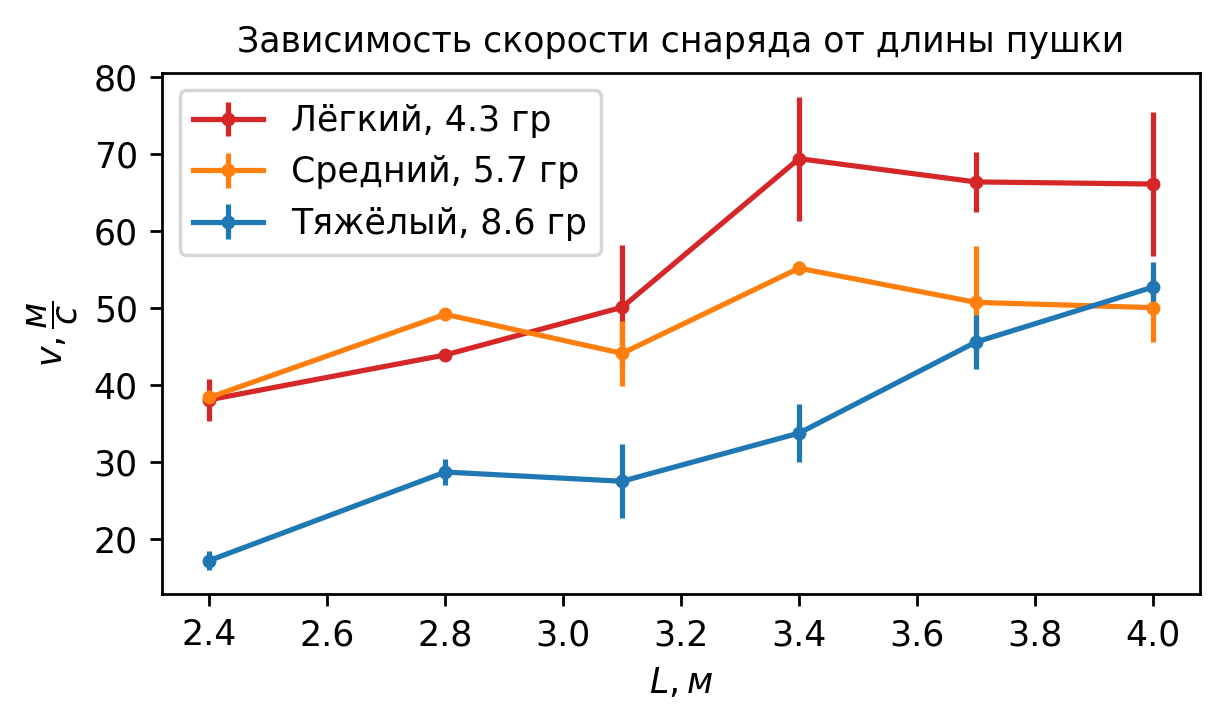

In [5]:
plt.figure(figsize=fig_size, dpi=dpi)

for bullet in bullets:
    name = bullet['name']
    m = bullet['mass']
    label = f'{name}, {m*1e3:.1f} гр'
    color = bullet['color']
    av_velocity = bullet['velocity']['average']
    sigma = bullet['velocity']['sigma']
    
    plt.errorbar(lengths, av_velocity, label=label, color=color, marker='.', yerr=sigma)

plt.xlabel('$L, м$')
plt.ylabel('$v, \dfrac{м}{с}$')
plt.title('Зависимость скорости снаряда от длины пушки', size='medium')
plt.legend()
plt.tight_layout()
plt.savefig(out_path('V-on-L'))

### График зависимости импульса от длины

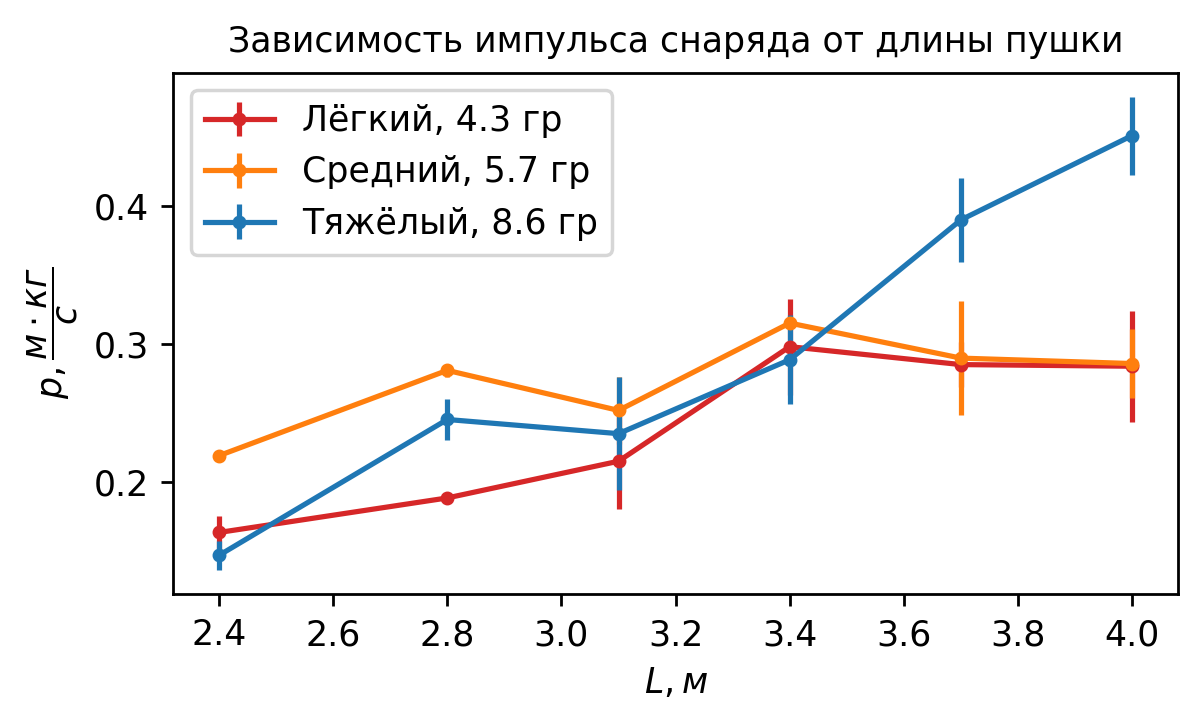

In [6]:
plt.figure(figsize=fig_size, dpi=dpi)

for bullet in bullets:
    name = bullet['name']
    m = bullet['mass']
    label = f'{name}, {m*1e3:.1f} гр'
    color = bullet['color']
    av_velocity = bullet['velocity']['average']
    sigma = bullet['velocity']['sigma']
    
    plt.errorbar(lengths, m * av_velocity, label=label, color=color, marker='.', yerr=m * sigma)

plt.xlabel('$L, м$')
plt.ylabel('$p, \dfrac{м \cdot кг}{с}$')
plt.title('Зависимость импульса снаряда от длины пушки', size='medium')
plt.legend()
plt.tight_layout()
plt.savefig(out_path('P-on-L'))

### График зависимости энергии от длины

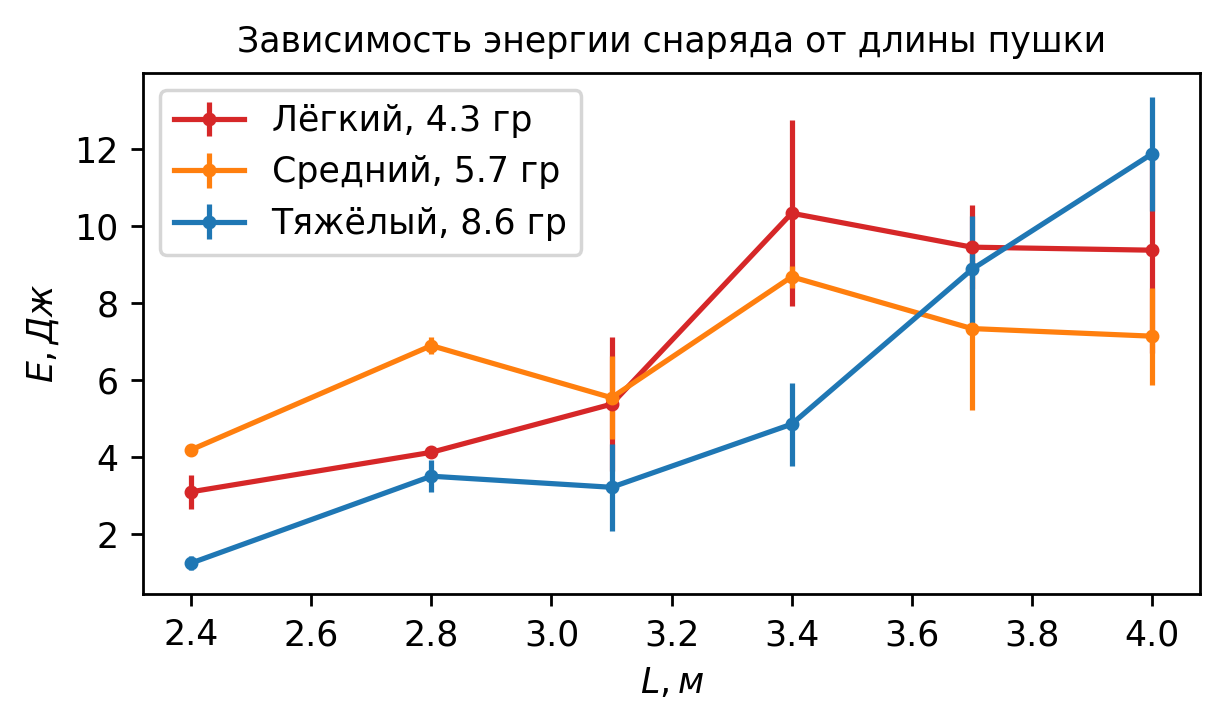

In [7]:
plt.figure(figsize=fig_size, dpi=dpi)

for bullet in bullets:
    name = bullet['name']
    m = bullet['mass']
    label = f'{name}, {m*1e3:.1f} гр'
    color = bullet['color']
    av_velocity = bullet['velocity']['average']
    sigma = bullet['velocity']['sigma']
    
    plt.errorbar(lengths, (m * av_velocity**2) / 2, label=label, color=color, marker='.', yerr=m * av_velocity * sigma)

plt.xlabel('$L, м$')
plt.ylabel('$E, Дж$')
plt.title('Зависимость энергии снаряда от длины пушки', size='medium')
plt.legend()
plt.tight_layout()
plt.savefig(out_path('E-on-L'))

In [72]:
m = 4.3e-3
p0 = 1e5
a = 2.8e6
L = 4
Ssn = 307.9e-6
Str = 336.6e-6
D = 0.16e4
R = 8.31
T = 293
Ftr = 1e-2

In [73]:
import sympy as smp
v = smp.Function('v')
t = smp.Symbol('t')
v = v(t)

$\dot{\nu} = -\dfrac{D\nu}{S_{тр}(L-x)^2}$

$m\ddot{x} = S_{сн}p_0 - \dfrac{\nu RT}{L - x}$

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from numba import njit

In [95]:
t = np.linspace(0, 0.05, 100)

In [96]:
n0 = 8.29e-4
x0 = 0
v0 = 0

S0 = (n0, x0, v0)

In [97]:
def dSdt(t, S):
    n, x, v = S
    return [
            (-D*n) / (Str * ((L - x) ** 2) ),
            v,
            (Ssn * p0)/m - (n * R * T) / (m * (L - x))
    ]

In [98]:
sol1 = odeint(dSdt, y0=S0, t=t, tfirst=True)

In [99]:
x = sol1.T[1]
v = sol1.T[2]
n = sol1.T[0]

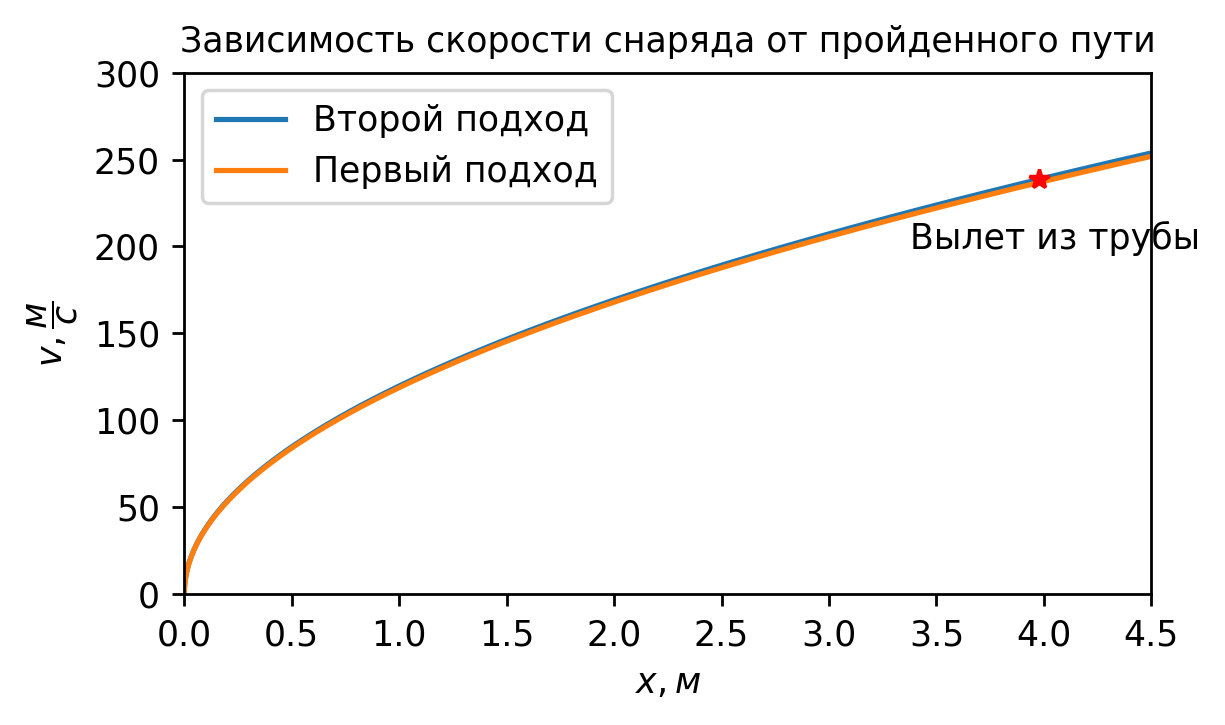

In [120]:
plt.figure(figsize=fig_size, dpi=dpi)

plt.plot(x, v, label="Второй подход")
plt.plot(x, np.sqrt(2 * x * ( Ssn * (p0 * 0.985) / (m) - 0.238 * 9.81 ) ), label="Первый подход")
plt.plot(x[66], v[66], "r*")
plt.annotate(xy=(x[66]-0.6, v[66]-40), text="Вылет из трубы")

plt.axis((0,4.5,0,300))
plt.ylabel('$v, \dfrac{м}{с}$')
plt.xlabel('$x, м$')
plt.title('Зависимость скорости снаряда от пройденного пути', size='medium')
plt.legend()
plt.tight_layout()
plt.savefig(out_path('2_v-on-x'))

In [103]:
x[66]

3.9780230098475498

In [104]:
v[66]

238.6817755204501